# 3D Visualization: Causal Metric

Load precomputed 3D UMAP embedding (causal metric) and create visualizations.

**Inputs:**
- `data/vectors/umap_embedding_32k_3d_causal.npy` - 3D coordinates
- `data/vectors/causal_norms_32k.npy` - Token norms for coloring

**Outputs:**
- `token_galaxy_3d_causal.html` - Interactive 3D visualization
- `token_galaxy_rotation_causal.gif` - Turntable animation

**Expected runtime:** ~2 minutes (mostly GIF rendering)

## Configuration

In [1]:
# Input files
INPUT_EMBEDDING = '../data/vectors/umap_embedding_32k_3d_causal.npy'
INPUT_NORMS = '../data/vectors/causal_norms_32k.npy'

# Output files
OUTPUT_HTML = 'token_galaxy_3d_causal.html'
OUTPUT_GIF = 'token_galaxy_rotation_causal.gif'

# Animation parameters
FRAMES = 180
FPS = 30
ELEVATION = 20

print(f"Configuration:")
print(f"  Input embedding: {INPUT_EMBEDDING}")
print(f"  Input norms: {INPUT_NORMS}")
print(f"  Outputs: {OUTPUT_HTML}, {OUTPUT_GIF}")
print(f"  Animation: {FRAMES} frames at {FPS} fps = {FRAMES/FPS:.1f} seconds")

Configuration:
  Input embedding: ../data/vectors/umap_embedding_32k_3d_causal.npy
  Input norms: ../data/vectors/causal_norms_32k.npy
  Outputs: token_galaxy_3d_causal.html, token_galaxy_rotation_causal.gif
  Animation: 180 frames at 30 fps = 6.0 seconds


## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

print("✓ Imports complete")

✓ Imports complete


## Load Data

In [3]:
print(f"Loading embedding from {INPUT_EMBEDDING}...")
embedding_3d = np.load(INPUT_EMBEDDING)

print(f"✓ Loaded embedding")
print(f"  Shape: {embedding_3d.shape}")
print(f"  X range: [{embedding_3d[:, 0].min():.2f}, {embedding_3d[:, 0].max():.2f}]")
print(f"  Y range: [{embedding_3d[:, 1].min():.2f}, {embedding_3d[:, 1].max():.2f}]")
print(f"  Z range: [{embedding_3d[:, 2].min():.2f}, {embedding_3d[:, 2].max():.2f}]")

print(f"\nLoading norms from {INPUT_NORMS}...")
causal_norms = np.load(INPUT_NORMS)

print(f"✓ Loaded norms")
print(f"  Shape: {causal_norms.shape}")
print(f"  Range: [{causal_norms.min():.2f}, {causal_norms.max():.2f}] logometers")
print(f"  Mean: {causal_norms.mean():.2f} logometers")
print(f"  CV: {causal_norms.std() / causal_norms.mean() * 100:.1f}%")

N = len(embedding_3d)
print(f"\n✓ Ready to visualize {N:,} tokens")

Loading embedding from ../data/vectors/umap_embedding_32k_3d_causal.npy...
✓ Loaded embedding
  Shape: (32000, 3)
  X range: [4.15, 9.74]
  Y range: [7.56, 12.25]
  Z range: [1.05, 6.24]

Loading norms from ../data/vectors/causal_norms_32k.npy...
✓ Loaded norms
  Shape: (32000,)
  Range: [21.45, 75.08] logometers
  Mean: 54.12 logometers
  CV: 14.7%

✓ Ready to visualize 32,000 tokens


## Create Interactive 3D Visualization (Plotly)

In [4]:
print(f"\nCreating interactive 3D visualization...")

fig = go.Figure(data=[go.Scatter3d(
    x=embedding_3d[:, 0],
    y=embedding_3d[:, 1],
    z=embedding_3d[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=causal_norms,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Causal Norm<br>(logometers)"),
        opacity=0.6,
    ),
    text=[f'{norm:.2f}' for norm in causal_norms],
    hovertemplate='Norm: %{text} logometers<extra></extra>',
)])

fig.update_layout(
    title='Token Galaxy in 3D (Causal Metric)',
    scene=dict(
        xaxis_title='UMAP 1',
        yaxis_title='UMAP 2',
        zaxis_title='UMAP 3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        ),
        aspectmode='data',
    ),
    width=1000,
    height=800,
)

# Save HTML
fig.write_html(OUTPUT_HTML)
print(f"✓ Saved interactive visualization to {OUTPUT_HTML}")

# Show inline
fig.show()


Creating interactive 3D visualization...
✓ Saved interactive visualization to token_galaxy_3d_causal.html


## Create Turntable Animation

In [5]:
print(f"\nCreating turntable animation...")
print(f"  Rendering {FRAMES} frames...")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding_3d[:, 0],
    embedding_3d[:, 1],
    embedding_3d[:, 2],
    c=causal_norms,
    cmap='viridis',
    s=1,
    alpha=0.5,
    rasterized=True
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Causal Norm (logometers)', rotation=270, labelpad=20)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
ax.set_title(f'Token Galaxy: {N:,} Tokens (Causal Metric)', pad=20, fontweight='bold')
ax.set_box_aspect([1, 1, 1])

def rotate(frame):
    azimuth = frame * (360 / FRAMES)
    ax.view_init(elev=ELEVATION, azim=azimuth)
    return scatter,

anim = FuncAnimation(
    fig, 
    rotate, 
    frames=FRAMES, 
    interval=1000/FPS,
    blit=False
)

print(f"  Saving GIF...")
anim.save(OUTPUT_GIF, writer='pillow', fps=FPS, dpi=100)

print(f"✓ Saved animation to {OUTPUT_GIF}")

plt.close()


Creating turntable animation...
  Rendering 180 frames...
  Saving GIF...
✓ Saved animation to token_galaxy_rotation_causal.gif


## Static View for Reference

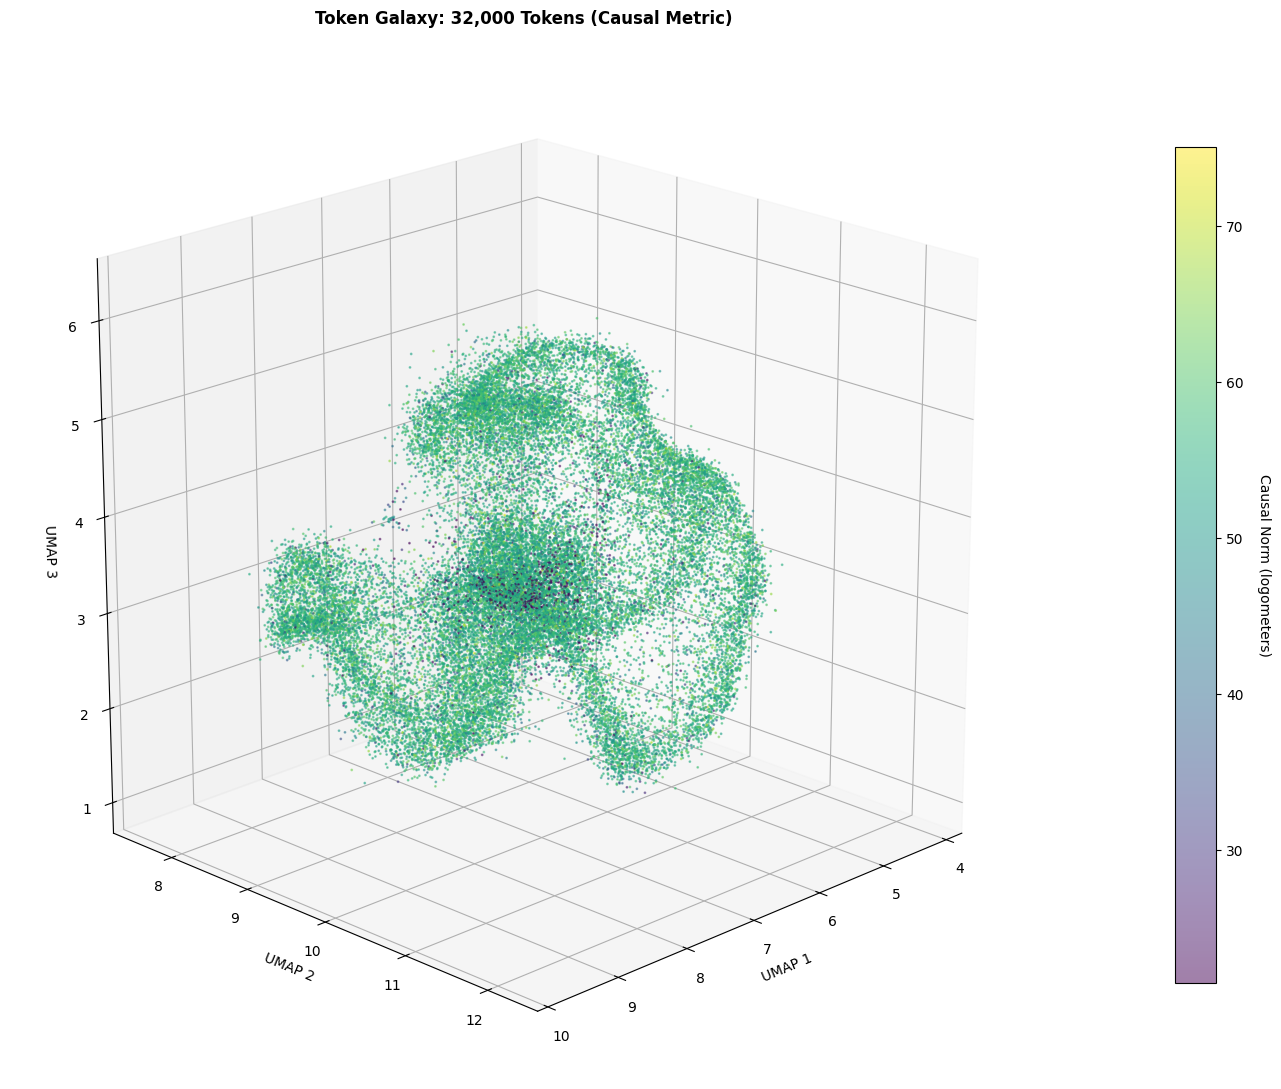


💡 Compare with Euclidean metric version (07.42)!
💡 Do they look the same or different?


In [6]:
fig = plt.figure(figsize=(14, 11))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    embedding_3d[:, 0],
    embedding_3d[:, 1],
    embedding_3d[:, 2],
    c=causal_norms,
    cmap='viridis',
    s=1,
    alpha=0.5,
    rasterized=True
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Causal Norm (logometers)', rotation=270, labelpad=20)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
ax.set_title(f'Token Galaxy: {N:,} Tokens (Causal Metric)', pad=20, fontweight='bold')
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

print("\n💡 Compare with Euclidean metric version (07.42)!")
print("💡 Do they look the same or different?")

## Summary

Created visualizations for causal metric embedding!

**Outputs:**
- `token_galaxy_3d_causal.html` - Interactive 3D (drag to rotate!)
- `token_galaxy_rotation_causal.gif` - Animated turntable

**Next:** Compare with Euclidean metric visualizations from 07.42.